### Pre-process the Data Set (normalization, grayscale, etc.)

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2
import random

In [46]:
def random_brightness(img, factor):#, nRep):
    # assume input is color image
    # convert Red, Green, Blue to Hue, Saturation, Value
    # factor describes the range of brightness scaling: (1 - factor, 1 + factor)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    bright_factor = random.uniform(1. - factor, 1. + factor)
    print("brightness", bright_factor)
    img_hsv = np.array(img_hsv, np.float)
    img_hsv[:,:,2] = np.minimum(255, img_hsv[:,:,2] * bright_factor)
    img_hsv = np.array(img_hsv, dtype = np.uint8)
    img_new = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    #X_bright = np.empty((nRep, 32, 32, 1))
    #for i in range(nRep):
    #    X_bright[i] = preprocess0(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
    #return X_bright
    #plt.imshow(random_brightness(X_train[index], 0.9))
    return img_new


brightness 0.5781337366845652
brightness 0.852764473484658


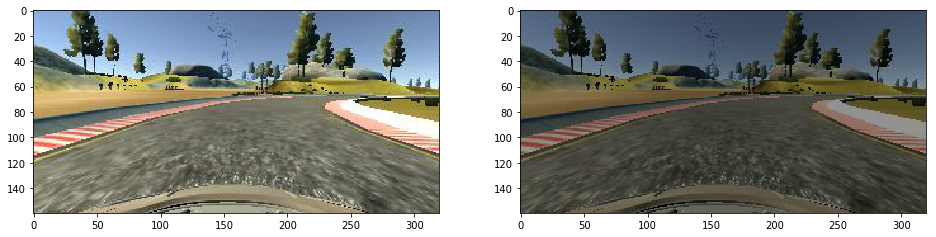

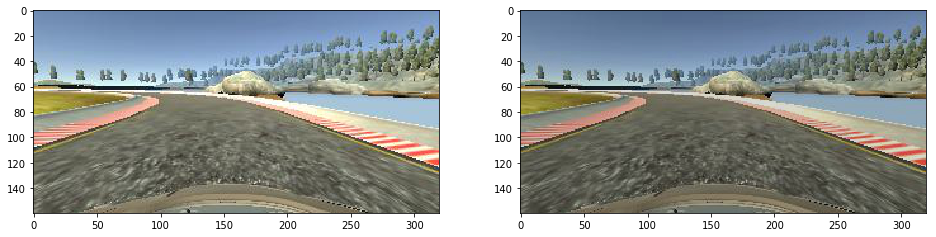

In [47]:
path = './data/IMG/'
#filenames = ['center_2016_12_01_13_33_45_217.jpg', 'center_2016_12_01_13_33_54_272.jpg', 'center_2016_12_01_13_33_59_244.jpg']
filenames = ['center_2016_12_01_13_33_45_217.jpg', 'center_2016_12_01_13_33_54_272.jpg']

#steer = [0.406227, -0.2306556, 0]
#steer = [0.406227, -0.406227, -0.2306556, 0.2306556]
steer = [0.406227, -0.2306556]
images = []
for file_name in filenames:
    file_path = path + file_name
    img = cv2.imread(file_path) #cv2 read in images as BGR (not RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #fl_img = cv2.flip(img, 1)
    br_img = random_brightness(img, 0.7)
    #print(img.shape)
    
    fig, ax = plt.subplots(ncols = 2, figsize = (16,9))
    ax[0].imshow(img)
    #ax[1].imshow(fl_img)
    ax[1].imshow(br_img)
    
    images.append(img)
    #images.append(fl_img)    #1 means flip around y-axis

In [26]:
# convert to numpy arrays for Keras
X_train = np.array(images)
y_train = np.array(steer)

In [27]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers import Convolution2D
from keras.layers.pooling import MaxPooling2D


In [28]:
model = Sequential()
model.add(Lambda(lambda x : x/255. - 0.5, input_shape = (160, 320, 3)))
#model.add(Cropping2D(cropping = ((70, 25), (0, 0))))
# 3 @ 1x1 filter to choose color space automatically
model.add(Convolution2D(3, 1, 1, init = 'he_normal', activation = 'elu', border_mode = 'valid', name = 'conv0'))
#
model.add(Convolution2D(24, 5, 5, init = 'he_normal', subsample = (2, 2), border_mode = 'valid', activation = 'elu', name = 'conv1'))
model.add(Convolution2D(36, 5, 5, init = 'he_normal', subsample = (2, 2), border_mode = 'valid', activation = 'elu', name = 'conv2'))
model.add(Convolution2D(48, 5, 5, init = 'he_normal', subsample = (2, 2), border_mode = 'valid', activation = 'elu', name = 'conv3'))
model.add(Convolution2D(64, 3, 3, init = 'he_normal', subsample = (1, 1), border_mode = 'valid', activation = 'elu', name = 'conv4'))
model.add(Convolution2D(64, 3, 3, init = 'he_normal', subsample = (1, 1), border_mode = 'valid', activation = 'elu', name = 'conv5'))
model.add(Flatten())
model.add(Dense(100, init = 'he_normal', activation = 'elu', name = 'full1'))
model.add(Dense(50, init = 'he_normal', activation = 'elu', name = 'full2'))
model.add(Dense(10, init = 'he_normal', activation = 'elu', name = 'full3'))
model.add(Dense(1, init = 'he_normal', name = 'full4'))

In [29]:
model.compile(loss = 'mse', optimizer = 'adam')
model.fit(X_train, y_train, nb_epoch = 50) #, validation_split = 0.2, shuffle = True
y_pred = model.predict(X_train)
print(y_pred)

model.save('model.h5')

Epoch 1/50
4/4 [==============================] - 1s - loss: 0.9035
Epoch 2/50
4/4 [==============================] - 0s - loss: 226.0990
Epoch 3/50
4/4 [==============================] - 0s - loss: 14.6106
Epoch 4/50
4/4 [==============================] - 0s - loss: 1.8547
Epoch 5/50
4/4 [==============================] - 0s - loss: 4.1926
Epoch 6/50
4/4 [==============================] - 0s - loss: 2.8254
Epoch 7/50
4/4 [==============================] - 0s - loss: 0.2923
Epoch 8/50
4/4 [==============================] - 0s - loss: 1.7143
Epoch 9/50
4/4 [==============================] - 0s - loss: 6.4911
Epoch 10/50
4/4 [==============================] - 0s - loss: 14.8305
Epoch 11/50
4/4 [==============================] - 0s - loss: 5.2029
Epoch 12/50
4/4 [==============================] - 0s - loss: 0.4172
Epoch 13/50
4/4 [==============================] - 0s - loss: 0.5462
Epoch 14/50
4/4 [==============================] - 0s - loss: 0.6958
Epoch 15/50
4/4 [======================